# E3 - Word Representations
### 1. Training a Word Embedder using Word2Vec

#### Selecting a Dataset
Find a good dataset in any language you like. It does not have to be English, any language you understand well or know well enough to judge a model will work. 

We will be exploring different Word Embeddings and Tokenizers. 
Here are some resources for datasets to use for Tokenization:
- [Kaggle Datasets](https://www.kaggle.com/datasets)

- [Hugging Face Datasets](https://huggingface.co/datasets)

- [The Leipzig Corpora Collection](https://wortschatz.uni-leipzig.de/en/download)

- [The Natural Tokenization Processing](https://www.nltk.org/nltk_data)

- [Common Crawl](https://commoncrawl.org)

#### Import Libraries

In [1]:
#%pip install nltk gensim scikit-learn matplotlib gensim torch

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

/software/rome/r23.04/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
nltk.download('punkt')

# TODO: Load your chosen dataset
with open('datasets/eng_news_2023_10K-sentences.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Basic preprocessing with regular expressions (lowercasing, removing special characters)
text = text.lower()
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
nltk.data.path.append('/Users/arthurnuernberg/nltk_data')  # Ensure NLTK data path is set

# Tokenization
tokens = word_tokenize(text)
print(f'Total tokens: {len(tokens)}')
print(tokens[:10])

[nltk_data] Downloading package punkt to /home/arnr274f/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total tokens: 197268
['1', 'must', 'be', 'staked', 'on', 'willie', 'mullins', 'to', 'have', 'a']


### Create Word Embeddings with Word2Vec

We use Word2Vec to create word embeddings. Word2Vec learns vector representations of words based on the context in which they appear, allowing similar words to have closer vectors in the embedding space.
Word2Vec has two main approaches:
1. **Skip-Gram**: Predicts context words from a center word.
2. **Continuous Bag of Words (CBOW)**: Predicts a center word from surrounding context words.
For simplicity, we'll use the CBOW approach.

In [4]:
embedding_dim = 100 
window_size = 5
min_word_count = 1
workers = 4

# TODO: Train Word2Vec model with 'Word2Vec'
word2vec_model = Word2Vec(sentences=[tokens], vector_size=embedding_dim, window=window_size,
                          min_count=min_word_count, workers=workers)
print("Word2Vec model training complete.")

Word2Vec model training complete.


### Explore and Visualize the Word Embeddings

Once the model is trained, we can explore the word embeddings. We'll look at some examples of similar words and visualize the embedding space with dimensionality reduction techniques.

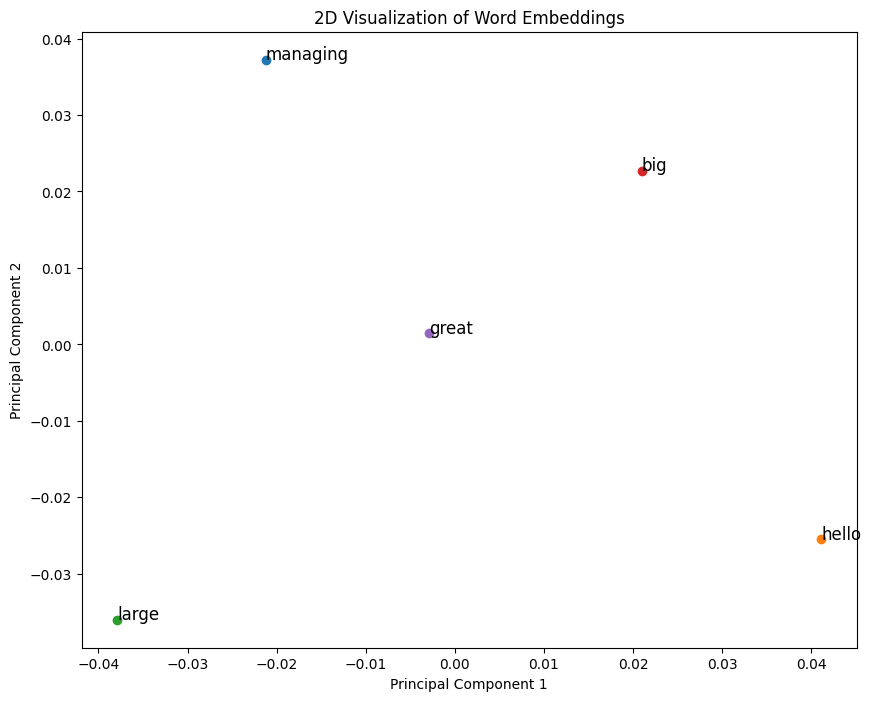

In [5]:
# TODO: Select a subset of words to visualize and play around with different tokens. 
words_to_visualize = ['managing', 'hello', 'large', 'big', 'great']  # Replace with words from your vocabulary
word_vectors = [word2vec_model.wv[word] for word in words_to_visualize]

# Reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced_vectors[i][0], reduced_vectors[i][1])
    plt.annotate(word, xy=(reduced_vectors[i][0], reduced_vectors[i][1]), fontsize=12)
plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [6]:
from gensim.downloader import load
dataset = load("text8")
sentences = list(dataset)  # Each sentence as a list of words

In [7]:
# Train Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=embedding_dim, window=window_size,
                          min_count=min_word_count, workers=workers)
print("Word2Vec model training complete.")

Word2Vec model training complete.


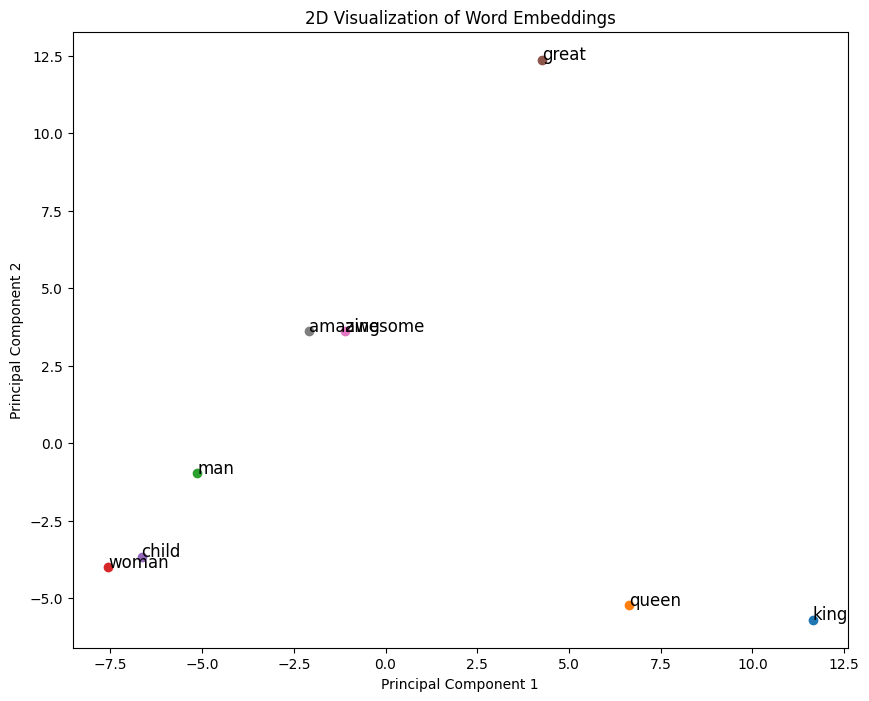

In [8]:
# Dimensionality Reduction and Visualization with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# TODO: Try different words with the trained word2vec model, trained on text8 dataset
words_to_visualize = ['king', 'queen', 'man', 'woman', 'child', 'great', 'awesome', 'amazing']
word_vectors = [model.wv[word] for word in words_to_visualize if word in model.wv]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced_vectors[i][0], reduced_vectors[i][1])
    plt.annotate(word, xy=(reduced_vectors[i][0], reduced_vectors[i][1]), fontsize=12)
plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Word2Vec Implementation with PyTorch (Skip-Gram Model)

### Imports

In [ ]:
import torch.optim as optim
import random
import torch
import torch.nn as nn
from collections import Counter

This model consists of two embedding layers:
- **Input embedding**: Maps the central word to its embedding.
- **Output embedding**: Used to predict context words. 

In [ ]:
class Word2VecSkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2VecSkipGram, self).__init__()
        self.input_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.output_embedding = nn.Embedding(vocab_size, embedding_dim)
    
    def forward(self, center_word, context_word):
        # Get embeddings for center and context words
        center_embedding = self.input_embedding(center_word)  # Shape: (batch_size, embedding_dim)
        context_embedding = self.output_embedding(context_word)  # Shape: (batch_size, embedding_dim)
        
        # Compute dot product (similarity score)
        similarity = torch.mul(center_embedding, context_embedding).sum(dim=1)
        return similarity

embedding_dim = 50

model = Word2VecSkipGram(vocab_size=vocab_size, embedding_dim=embedding_dim)
print(model)

In [ ]:
# Define the loss function
class NegativeSamplingLoss(nn.Module):
    def __init__(self):
        super(NegativeSamplingLoss, self).__init__()
        self.log_sigmoid = nn.LogSigmoid()

    def forward(self, positive_similarity, negative_similarity):
        pos_loss = self.log_sigmoid(positive_similarity).mean()
        neg_loss = self.log_sigmoid(-negative_similarity).mean()
        return - (pos_loss + neg_loss)

learning_rate = 0.001
num_epochs = 100
num_negative_samples = 5

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = NegativeSamplingLoss()

def get_negative_samples(vocab_size, batch_size, num_samples):
    return torch.randint(0, vocab_size, (batch_size, num_samples))

for epoch in range(num_epochs):
    total_loss = 0
    random.shuffle(pairs)  # Shuffle pairs each epoch
    for center_word, context_word in pairs:
        center_idx = torch.tensor([word_to_index[center_word]], dtype=torch.long)
        context_idx = torch.tensor([word_to_index[context_word]], dtype=torch.long)
        
        positive_similarity = model(center_idx, context_idx)
        
        # Negative sampling
        negative_samples = get_negative_samples(vocab_size, 1, num_negative_samples)
        negative_similarity = model(center_idx.repeat(num_negative_samples), negative_samples.view(-1))
        
        # Calculate loss and update model
        loss = criterion(positive_similarity, negative_similarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(pairs):.4f}")